<a href="https://colab.research.google.com/github/MilanHassan/Python-Projects/blob/main/Forecast_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data cleaning and extracting only the data we need from the larger atmospheric emissions ghg excel file 

In [ ]:
# import neccesary modules 
import pandas as pd 
# read excel file from directory
# skiprows=3 will skips the first 3 rows
df = pd.read_excel('atmosphericemissionsghg.xlsx', skiprows=3, sheet_name='GHG total')

#Iterating through the whole dataset
for i in range(len(df)):
	if str(df['Unnamed: 2'][i]) == 'Total greenhouse gas emissions':
		# if in 3rd column, a cell value matched to 'Total greenhouse gas emissions'
		# copy that complete row and make a new dataframe from it
		output = pd.DataFrame(df.iloc[i])
		break # if found 'Total greenhouse gas emissions' once then break the loop 

output = output.reset_index() # reseting the new dataframe index
output = output.iloc[3:] #taking out the first 3 rows values
output = output.rename(columns={'index':'Year',22:'Total greenhouse gas emissions'}) # renaming the column names
output.to_excel('Output.xlsx',index=False) # create new excel file with formatted and cleaned data called Output.xlsx

Section 1 - Modelling annual GHG emissions

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# read excel file from directory
var = pd.read_excel('Output.xlsx')
print(var)

    Year  Total greenhouse gas emissions
0   1990                        830696.6
1   1991                        840936.5
2   1992                        821212.8
3   1993                        803452.2
4   1994                        795337.4
5   1995                        791079.6
6   1996                        818825.1
7   1997                        794326.7
8   1998                        795544.8
9   1999                        765962.2
10  2000                        768101.8
11  2001                        775204.9
12  2002                        756913.8
13  2003                        767124.7
14  2004                        769469.8
15  2005                        765934.0
16  2006                        751687.8
17  2007                        740694.2
18  2008                        722365.2
19  2009                        663614.2
20  2010                        681306.1
21  2011                        640004.8
22  2012                        653487.3
23  2013        

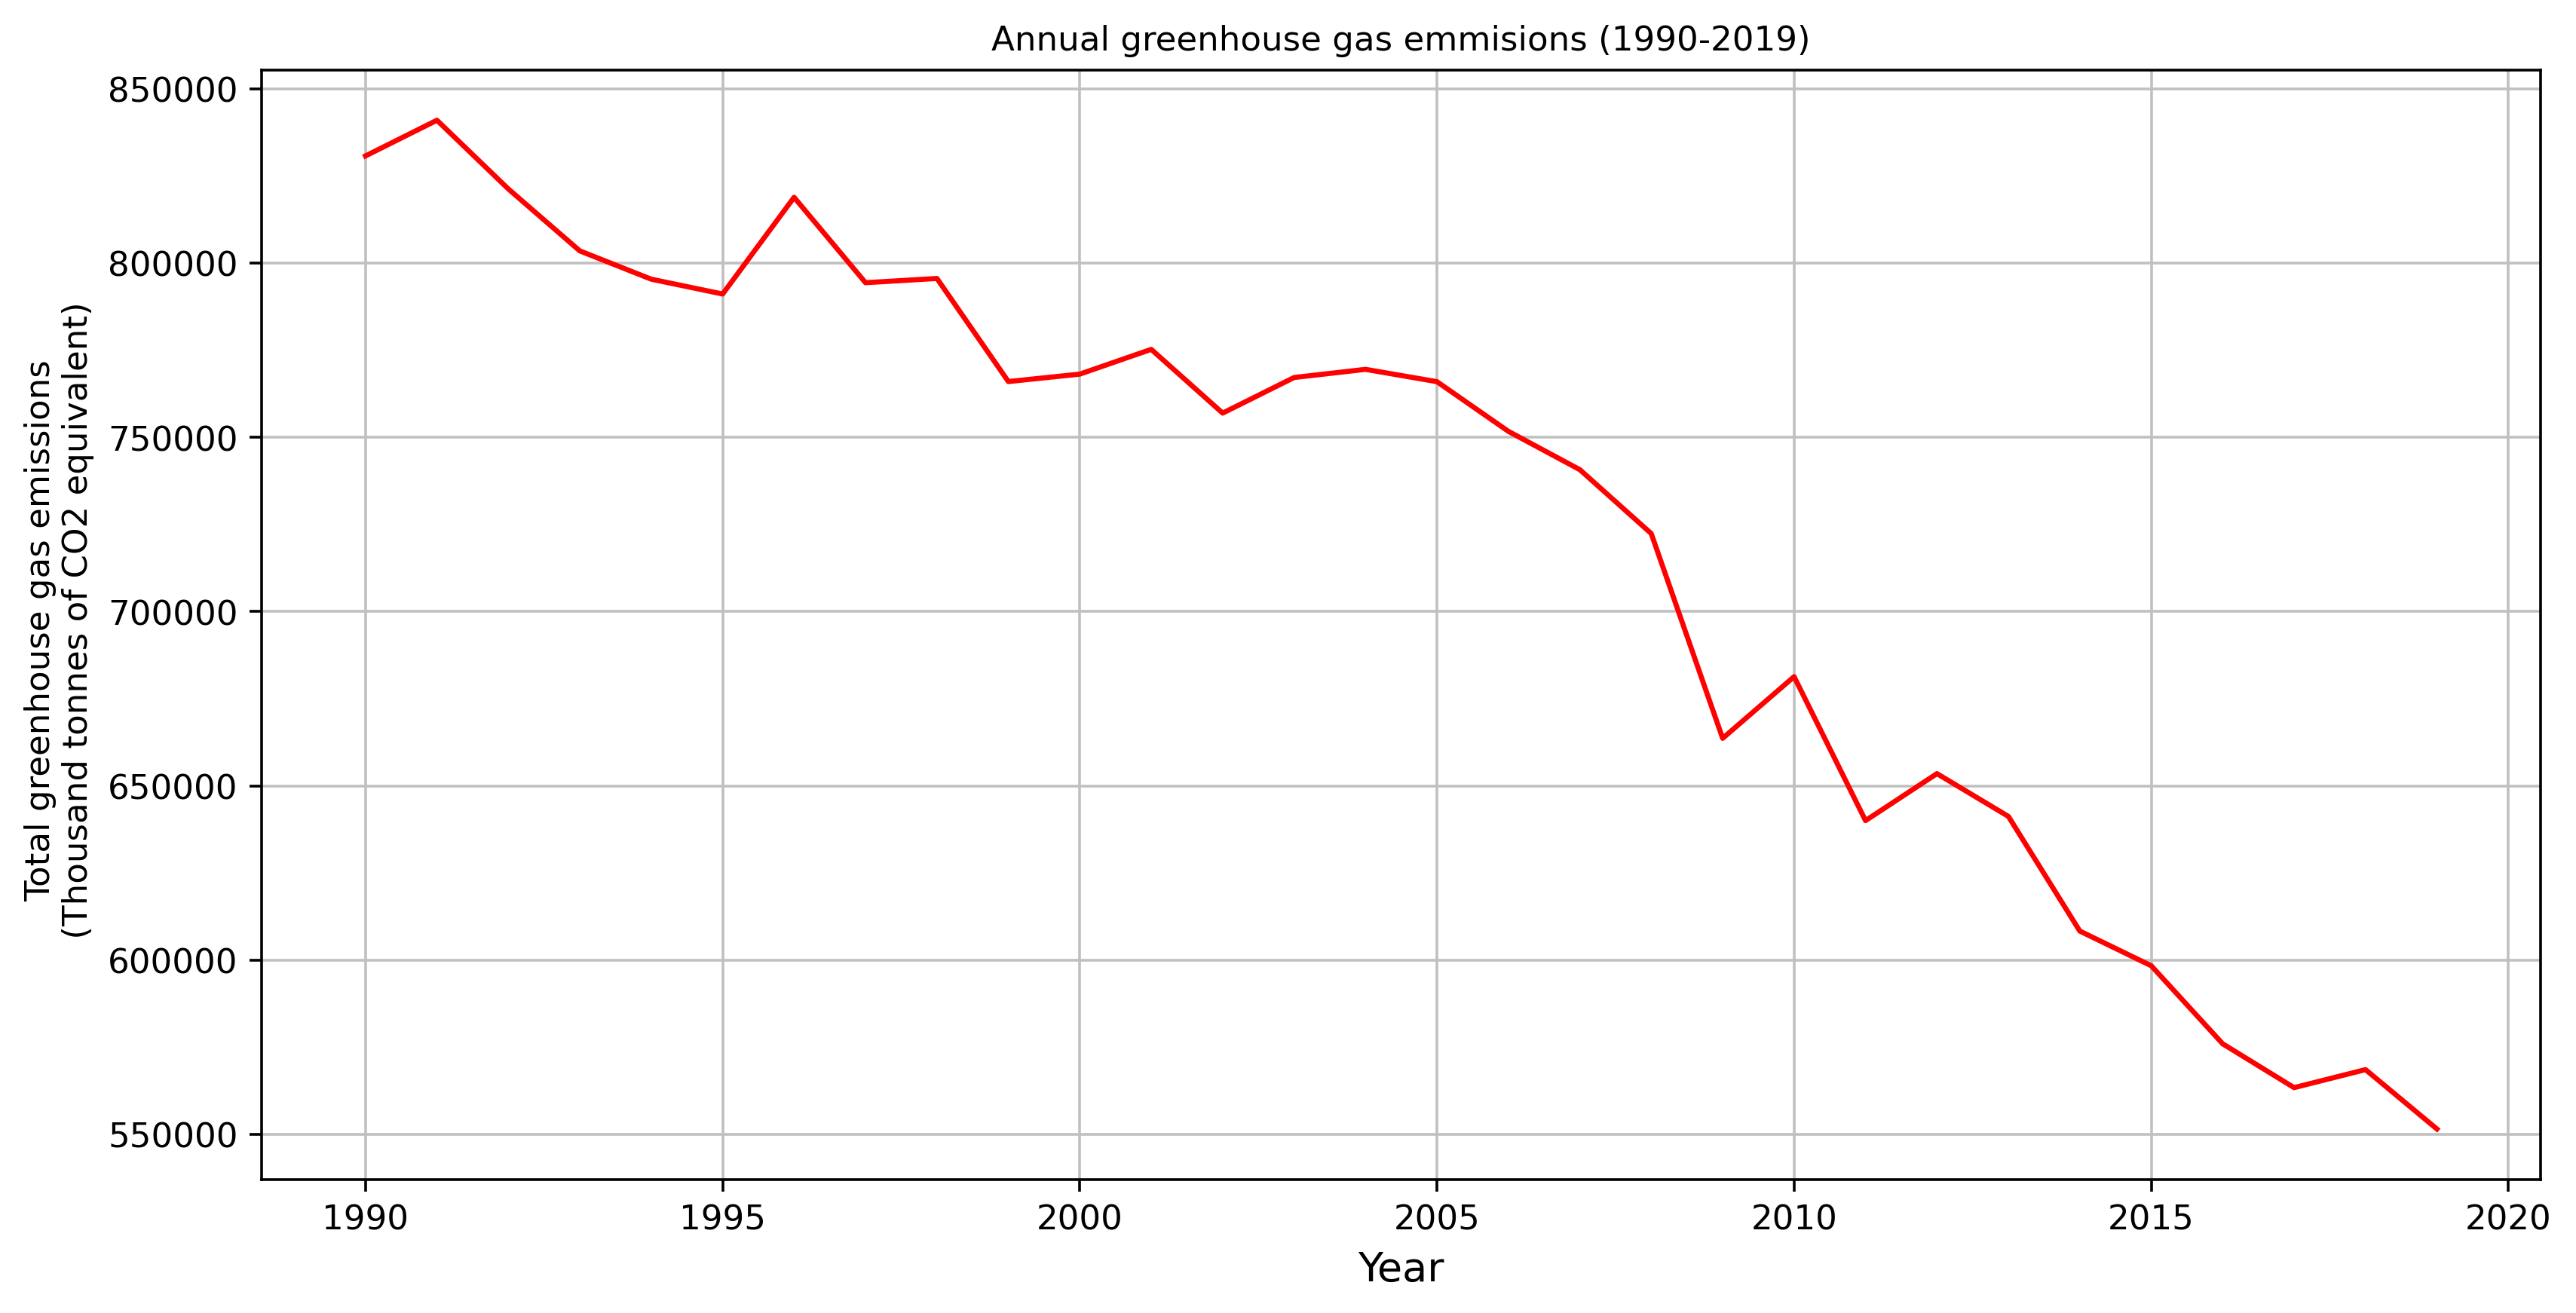

In [ ]:
# plotting graph - specify x and y values 
x = list(var['Year'])
y = list(var['Total greenhouse gas emissions'])

# making the graph look nice 

plt.figure(figsize=(12,6))
plt.rcParams['figure.dpi'] = 325
plt.rcParams['savefig.dpi'] = 325
ax = plt.axes()
plt.plot(x,y, color='red')
ax.set_facecolor('white')
ax.patch.set_edgecolor('white')  
ax.patch.set_linewidth('1')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total greenhouse gas emissions \n (Thousand tonnes of CO2 equivalent)', fontsize=10)
plt.title('Annual greenhouse gas emmisions (1990-2019)' , fontsize=10)
plt.grid(c='silver')
plt.grid(True)

plt.show()

Section 2 - Forecasting GHG emmissions 5 years into the future

Was created by watching youtube guide online. URL: https://youtu.be/KvLG1uTC-KU

In [ ]:
# check prophet version
import fbprophet
from fbprophet import Prophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
# load data
path = '/content/Output.xlsx'
df = pd.read_excel(path, header=0)
# summarise shape
print(df.shape)
# show first few rows
print(df.head())

(30, 2)
   Year  Total greenhouse gas emissions
0  1990                        830696.6
1  1991                        840936.5
2  1992                        821212.8
3  1993                        803452.2
4  1994                        795337.4


In [ ]:
# change column names to ds and y because fbprophet uses that 
df.columns = ['ds','y']
# check it has been done properly 
print(df.head())

     ds         y
0  1990  830696.6
1  1991  840936.5
2  1992  821212.8
3  1993  803452.2
4  1994  795337.4


In [ ]:
# check data types (fbprophet needs the 'ds' component to be in datetime format)
df.dtypes

ds      int64
y     float64
dtype: object

In [ ]:
# change 'ds' column from integar to datetime format
df.ds = pd.to_datetime(df.ds, format='%Y')
# check it has been done properly 
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
# create a new model with confindence intervel of 95% 
m = Prophet(interval_width=0.95)
# trains the model 
model = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [ ]:
# forecast 5 years into the future 
future = m.make_future_dataframe(periods=6, freq='Y')
forecast = m.predict(future)
# check that we have got forecast values for 5 years into the future by looking at the tail of the data (value we care about is yhat)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2020-12-31,-226362.177302,495137.677330,546267.025799,-228473.012513,-224289.443197,746678.532709,746678.532709,746678.532709,746678.532709,746678.532709,746678.532709,0.0,0.0,0.0,520316.355407
32,2021-12-31,-241376.294749,485202.299345,537088.022169,-245082.416296,-237876.664388,751737.658993,751737.658993,751737.658993,751737.658993,751737.658993,751737.658993,0.0,0.0,0.0,510361.364244
33,2022-12-31,-256390.412197,474231.486199,524484.494573,-261906.841977,-250509.069878,757741.174413,757741.174413,757741.174413,757741.174413,757741.174413,757741.174413,0.0,0.0,0.0,501350.762215
34,2023-12-31,-271404.529645,468121.084047,519427.241981,-279127.557538,-263650.844773,764682.954050,764682.954050,764682.954050,764682.954050,764682.954050,764682.954050,0.0,0.0,0.0,493278.424405
35,2024-12-31,-286459.781662,433995.074861,485313.450594,-296445.461525,-276552.072343,746678.532709,746678.532709,746678.532709,746678.532709,746678.532709,746678.532709,0.0,0.0,0.0,460218.751047


In [ ]:
# check all data is there + 5 new predictions 
forecast[['ds', 'yhat']]

,ds,yhat
0,1990-01-01,828753.151216
1,1991-01-01,825756.576587
2,1992-01-01,823710.962212
3,1993-01-01,811862.870636
4,1994-01-01,807917.083136
5,1995-01-01,804920.508539
6,1996-01-01,802874.894223
7,1997-01-01,791026.802717
8,1998-01-01,787081.015242
9,1999-01-01,784084.440670


Text(0.5, 1.0, 'Annual greenhouse gas emmisions (1990-2024) forecast')

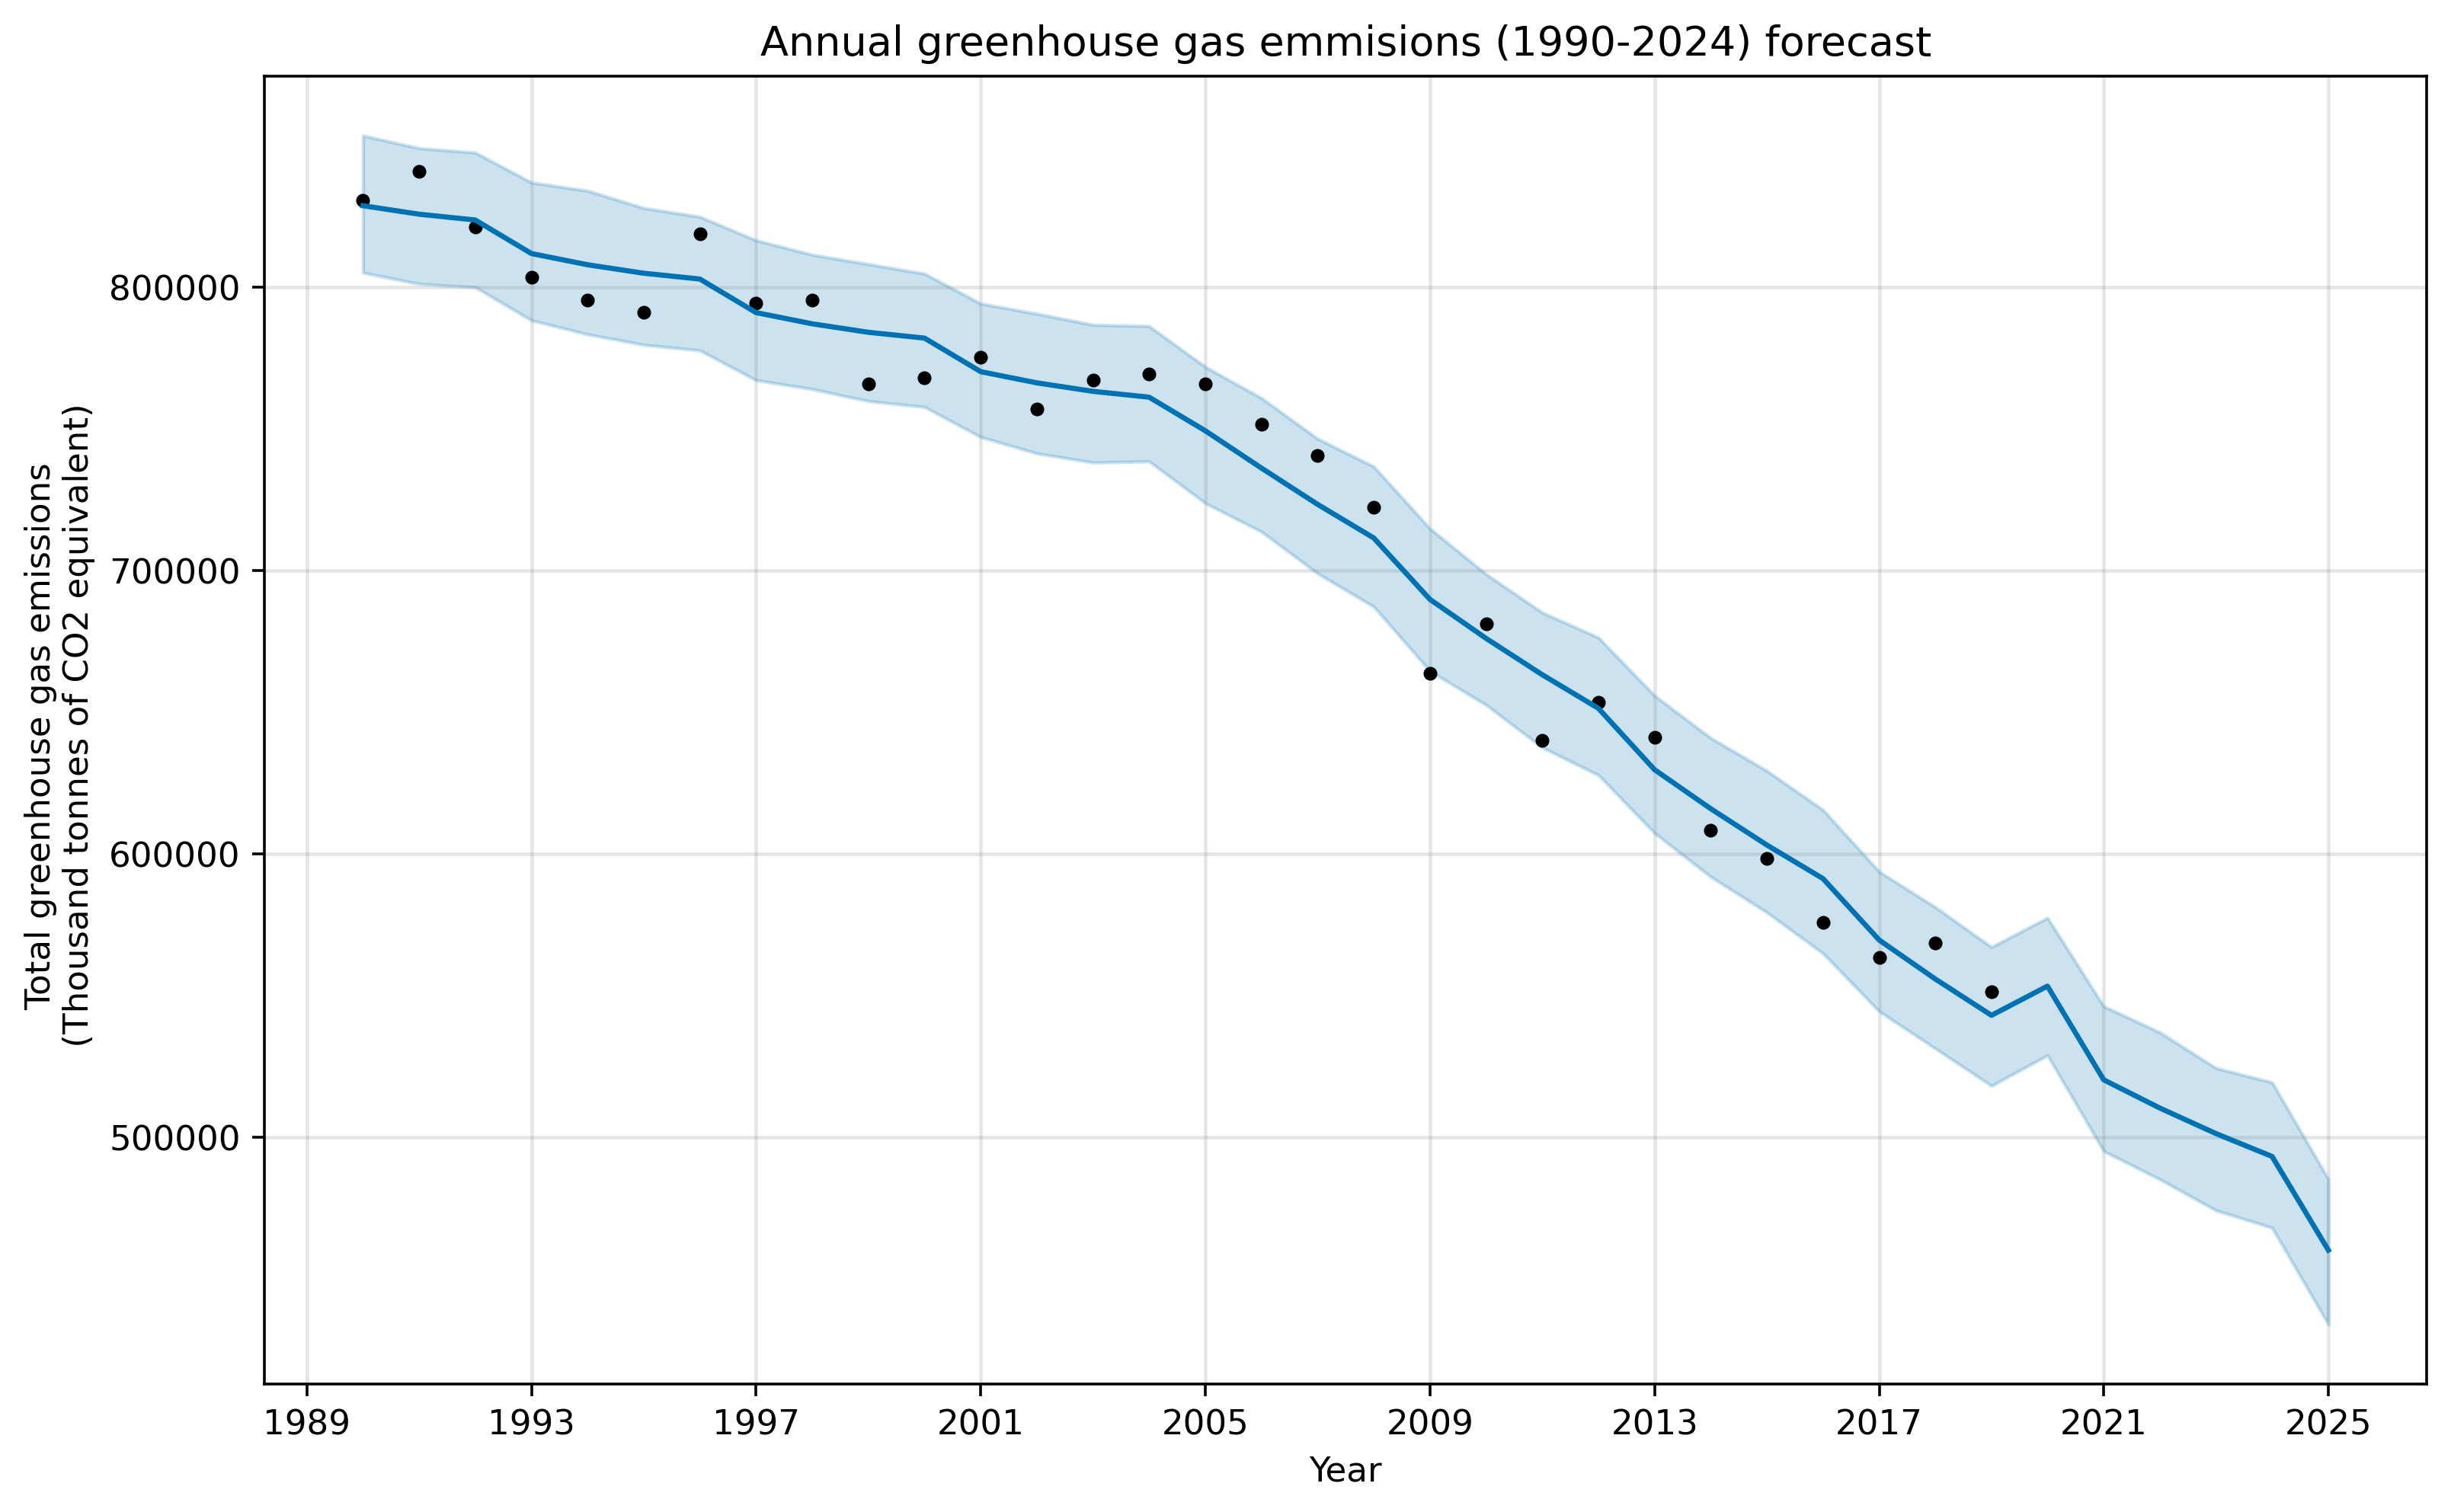

In [ ]:
# blue line is the prediction, light blue lines above and below are your yhat upper and yhat lower and black dots is the original data
plot1 = m.plot(forecast, xlabel='Year', ylabel='Total greenhouse gas emissions \n (Thousand tonnes of CO2 equivalent)')
ax = plot1.gca()
ax.set_title("Annual greenhouse gas emmisions (1990-2024) forecast", size=12)